In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.saving import save_model
from tensorflow.keras.layers import Input

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  
  # reshape the dataset to have single channel
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

  # one hot encode target value
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return x_train, y_train, x_test, y_test

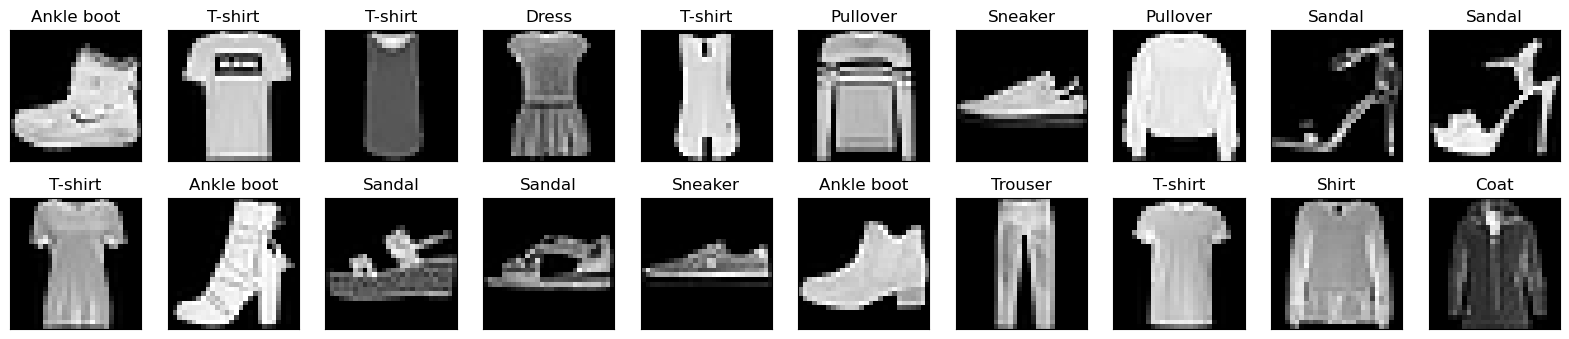

In [10]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train, y_train, _, _ = load_dataset()

fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  plt.subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(classes[y_train[idx].argmax()])

In [11]:
def prep_pixels(x_train, x_test):
  
  # convert from integers to floats
  x_train_norm = x_train.astype('float32')
  x_test_norm = x_test.astype('float32')

  # normalize to range 0-1
  x_train_norm = x_train_norm / 255
  x_test_norm = x_test_norm / 255

  # return normalized images
  return x_train_norm, x_test_norm

In [12]:


def define_model():
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))  # Add Input layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=10, activation='softmax'))
  
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
    return model


In [24]:
def run_test_harness():

  # load the dataset
  x_train, y_train, x_test, y_test = load_dataset()

  # prepare pixel data
  x_train, x_test = prep_pixels(x_train, x_test)

  #  define model
  model = define_model()

  # fit the model on training images
  model.fit(x_train, y_train, batch_size = 40, epochs = 8)
    
  # save the trained model for future use or deployment
  tf.keras.saving.save_model(model, r'C:\Users\anass\OneDrive\Desktop\cnn_fmnist.keras')

In [25]:
run_test_harness()

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8013 - loss: 0.5611
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8983 - loss: 0.2836
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9080 - loss: 0.2523
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9212 - loss: 0.2158
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9278 - loss: 0.1950
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9369 - loss: 0.1726
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9411 - loss: 0.1592
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9465 - loss: 0.1429


In [26]:
# Loading the saved model
model = load_model(r'C:\Users\anass\OneDrive\Desktop\cnn_fmnist.keras')

# Recompile the model after loading
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# load the test data
_, _, x_test, y_test = load_dataset()

# prepare pixel data
_, x_test = prep_pixels(x_train, x_test)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

print()
print('Accuracy of the model on the test dataset: ', round(accuracy, 4))
print('Loss of the model on the test dataset: ', round(loss, 4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9107 - loss: 0.2800

Accuracy of the model on the test dataset:  0.9106
Loss of the model on the test dataset:  0.2764


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
5


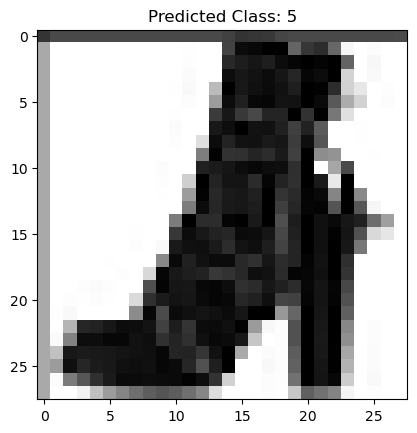

In [27]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load the single image
img = load_img(r'C:\Users\anass\clothing_predictor\static\20.png', color_mode='grayscale', target_size=(28, 28))

# convert image into array
img = img_to_array(img)

# reshape image into (1, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# prepare pixel data
img = img.astype('float32')
img = img / 255.0

# load the saved model (ensure the correct extension .h5)
model = load_model(r'C:\Users\anass\OneDrive\Desktop\cnn_fmnist.keras')

# predict the class
pred_class = model.predict(img)

# show predicted class
print(pred_class.argmax())

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Predicted Class: " + str(pred_class.argmax()))  # Adjust the title as needed
plt.show()